# <ins>Predicting Adult Mortality Rate</ins>
### CIS 5450 Final Project
#### **Group Members:** Brian Frechette, Timothy George, Daniel Islam
#### Dataset: Kaggle - Country Health Nutrition and Population Data
https://www.kaggle.com/datasets/theworldbank/health-nutrition-and-population-statistics
#### TA: Akshay Manikandan

# **Part I:** Introduction and Background

This project aims to use machine learning techniques on the global health, nutrition, and population dataset to accurately forecast adult mortality rates for specific countries. Adult mortality rate is defined as the probability of dying between 15 and 60 years old [[World Health Organization]](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/adult-mortality-rate-(probability-of-dying-between-15-and-60-years-per-1000-population)), and it is frequently expressed in the form of number of deaths per 1000. For example, a mortality rate of 200 means 200 per 1000 people are expected to die between age 15 and 60.  Mortality rate serves as a critical indicator of a nation's overall health and well-being, making its prediction valuable across multiple domains.

Predicting mortality holds significant implications for health policy, offering insights into resource allocation and targeted medical intervention. This can be critical to understanding vulnerable populations and emerging disease trends. High adult mortality rates often signal issues such as inadequate healthcare access, disease burden, and socioeconomic disparities. For instance, during the COVID-19 pandemic, anticipating mortality trends could have facilitated targeted interventions, potentially averting outbreaks and resource shortages.

This predictive model can also help various charitable organizations and government agencies, providing them with timely insights to strategically plan how aid is distributed across regions that will need it most.  

By analyzing the contributing factors to high mortality rates, we can gain deeper insights into the interplay of other indicators. This understanding enables us to identify and address correlated yet unexpected factors that influence death. This can help manage a country's overall health outcomes and life expectancy.

## **1.1** Importing Packages and Data Loading

We have imported the necessary packages below. We are reading in the Kaggle data using the API command, then unzipping it into the notebook directory.

In [ ]:
# import packages
import json
import glob
import re
import os
import warnings
from google.colab import drive
from collections import Counter
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
%%capture
!apt update
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!!kaggle datasets download -d theworldbank/health-nutrition-and-population-statistics

['Downloading health-nutrition-and-population-statistics.zip to /content',
 '',
 '  0% 0.00/14.0M [00:00<?, ?B/s]',
 '  7% 1.00M/14.0M [00:00<00:09, 1.48MB/s]',
 ' 14% 2.00M/14.0M [00:00<00:04, 2.91MB/s]',
 ' 29% 4.00M/14.0M [00:00<00:01, 6.15MB/s]',
 ' 57% 8.00M/14.0M [00:01<00:00, 12.7MB/s]',
 ' 79% 11.0M/14.0M [00:01<00:00, 16.5MB/s]',
 '',
 '100% 14.0M/14.0M [00:01<00:00, 11.7MB/s]']

In [ ]:
!unzip /content/health-nutrition-and-population-statistics.zip

Archive:  /content/health-nutrition-and-population-statistics.zip
  inflating: data.csv                


In [ ]:
country_health_data_df = pd.read_csv('data.csv')
country_health_data_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.300000,NaN,9.700000,NaN,NaN,26.800000,NaN,NaN
89006,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.900000,NaN,7.300000,NaN,NaN,12.900000,NaN,NaN
89007,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.000000,0.000000,77.000000,49.000000,47.000000,61.000000,34.000000,32.000000,NaN,NaN
89008,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN


## **1.2** Summarizing the Data

In order to get an idea of how the data is set up, we want to call pandas  DataFrame methods that provide summaries of the nature of the data. We can see below that the columns are the years that contain data for a given country name and indicator combination. Additionally, the country name, country code, indicator name, and indicator code are all objects, while the rest of the numerical data are all of type float.


In [ ]:
country_health_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [ ]:
country_health_data_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
count,3.548200e+04,3.532500e+04,3.588900e+04,3.545200e+04,3.548300e+04,3.560300e+04,3.553800e+04,3.602200e+04,3.557700e+04,3.563000e+04,...,5.425500e+04,5.387800e+04,5.443700e+04,5.709900e+04,5.492200e+04,5.492700e+04,5.292400e+04,5.219900e+04,4.306800e+04,0.0
mean,4.398856e+06,4.477329e+06,4.483279e+06,4.634875e+06,4.727806e+06,4.810557e+06,4.923225e+06,4.958680e+06,5.126162e+06,5.229267e+06,...,1.066701e+08,1.178440e+08,1.194416e+08,1.202183e+08,1.354606e+08,1.381746e+08,1.470674e+08,1.534580e+08,9.105685e+06,NaN
std,4.948245e+07,5.013205e+07,5.054473e+07,5.192122e+07,5.297849e+07,5.401988e+07,5.526006e+07,5.607026e+07,5.763263e+07,5.887277e+07,...,1.017662e+10,1.077350e+10,1.114136e+10,1.132855e+10,1.212198e+10,1.255757e+10,1.312843e+10,1.388442e+10,1.112609e+08,NaN
min,-2.374024e+00,-2.498824e+00,-3.826648e+06,-3.206682e+00,-3.078607e+00,-2.978527e+00,-3.072258e+00,-4.094255e+06,-4.263603e+00,-4.645452e+00,...,-2.272986e+07,-7.720454e+00,-7.829848e+00,-9.816607e+00,-8.166639e+00,-1.578482e+07,-7.726345e+00,-7.709485e+00,-7.784170e+00,NaN
25%,1.907975e+01,2.130000e+01,1.790000e+01,2.228200e+01,2.236877e+01,2.013357e+01,2.196439e+01,1.779723e+01,2.226600e+01,2.237234e+01,...,1.360000e+01,1.351170e+01,1.377504e+01,1.326888e+01,1.410000e+01,1.257937e+01,1.393631e+01,1.387011e+01,1.490000e+01,NaN
50%,5.282000e+03,5.794000e+03,5.158000e+03,5.945000e+03,6.065000e+03,5.998000e+03,6.240000e+03,5.767000e+03,6.438000e+03,6.529500e+03,...,9.608101e+01,9.699493e+01,9.670839e+01,9.155791e+01,9.633862e+01,9.610010e+01,9.900000e+01,9.896778e+01,2.206000e+03,NaN
75%,9.993525e+04,1.034000e+05,1.025840e+05,1.078488e+05,1.107500e+05,1.125765e+05,1.156312e+05,1.151888e+05,1.211970e+05,1.243615e+05,...,8.397350e+04,8.621775e+04,8.342100e+04,6.758400e+04,8.207750e+04,8.399800e+04,9.839350e+04,1.037375e+05,1.802958e+05,NaN
max,3.035056e+09,3.076121e+09,3.129064e+09,3.193947e+09,3.259355e+09,3.326054e+09,3.395866e+09,3.465297e+09,3.535512e+09,3.609910e+09,...,2.253595e+12,2.358301e+12,2.451062e+12,2.546451e+12,2.646913e+12,2.750543e+12,2.833419e+12,2.985748e+12,7.346633e+09,NaN


# **Part II:** Exploratory Data Analysis

## **2.1** Preliminary Cleaning and Wrangling

### **2.1.1** Transforming the Data

Since we want to use other indicators to predict mortality rate, we will be transforming the data into a common data science format where features are the columns. In order to do this, we melt the year columns into a single column, then we pivot the indicator name column to be the new column headers. This will produce a data point for every country-year combination.

In [ ]:
# drop unnamed column from reading in the csv
country_health_data_df = country_health_data_df.drop(columns=['Unnamed: 60'])
# melt the year column headers into a single column
melted_df = pd.melt(country_health_data_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
# drop country code and indicator code because they are not useful
melted_df.drop(['Country Code', 'Indicator Code'], axis=1, inplace=True)
# pivot the table so the column headers are the indicators for each country year combination given by each row
transformed_data_df = melted_df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()
transformed_data_df

Indicator Name,Country Name,Year,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1960,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,739462.0,8.221,5.253807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,779754.0,8.508,5.305559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,822719.0,8.805,5.363622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,868325.0,9.110,5.395136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,917022.0,9.426,5.456539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,Zimbabwe,2011,55.9,53.0,43000.0,48.0,114.1658,1300000.0,74000.0,1200000.0,...,4706484.0,33.015,1.449081,46.5,7.3,25.4,9.7,47.0,3.5,58.899308
14444,Zimbabwe,2012,NaN,NaN,37000.0,NaN,113.3310,1300000.0,70000.0,1200000.0,...,4782430.0,32.834,1.600765,NaN,NaN,NaN,NaN,61.0,NaN,58.939080
14445,Zimbabwe,2013,NaN,NaN,35000.0,NaN,111.8664,1300000.0,69000.0,1300000.0,...,4864823.0,32.654,1.708155,NaN,NaN,NaN,NaN,34.0,NaN,58.900126
14446,Zimbabwe,2014,62.5,59.6,30000.0,58.6,110.4018,1400000.0,65000.0,1300000.0,...,4955055.0,32.501,1.837793,NaN,12.9,NaN,26.8,32.0,NaN,58.822335


We print the country names below, and we can see that there are certain country labels for groups of countries, demographic categories, or social/economic classifications. Since these represent groups of countries that may already be represented in the data, we hand picked them out and chose to drop them.

In [ ]:
set(transformed_data_df['Country Name'].values)

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD coun

In [ ]:
non_valid_countries = [
    'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
    'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)',
    'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)',
    'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
    'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification',
    'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)',
    'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states',
    'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 'South Asia',
    'South Asia (IDA & IBRD)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World'
]

# Drop the non valid country names from the dataset
valid_transformed_df = transformed_data_df[~transformed_data_df['Country Name'].isin(non_valid_countries)]

# Reset the index
valid_transformed_df.reset_index(drop=True, inplace=True)
valid_transformed_df

Indicator Name,Country Name,Year,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1960,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,739462.0,8.221,5.253807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,779754.0,8.508,5.305559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,822719.0,8.805,5.363622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,868325.0,9.110,5.395136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,145.3210,NaN,NaN,NaN,...,917022.0,9.426,5.456539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,Zimbabwe,2011,55.9,53.0,43000.0,48.0,114.1658,1300000.0,74000.0,1200000.0,...,4706484.0,33.015,1.449081,46.5,7.3,25.4,9.7,47.0,3.5,58.899308
12148,Zimbabwe,2012,NaN,NaN,37000.0,NaN,113.3310,1300000.0,70000.0,1200000.0,...,4782430.0,32.834,1.600765,NaN,NaN,NaN,NaN,61.0,NaN,58.939080
12149,Zimbabwe,2013,NaN,NaN,35000.0,NaN,111.8664,1300000.0,69000.0,1300000.0,...,4864823.0,32.654,1.708155,NaN,NaN,NaN,NaN,34.0,NaN,58.900126
12150,Zimbabwe,2014,62.5,59.6,30000.0,58.6,110.4018,1400000.0,65000.0,1300000.0,...,4955055.0,32.501,1.837793,NaN,12.9,NaN,26.8,32.0,NaN,58.822335


### **2.1.2** Handling Null Values

A visual inspection of the dataframe shows us that there are many null values scattered across. The data collection is not consistent for all countries, and many countries have data before or after a certain year. Handling these null values will have a large influence on the result of the modeling.

In the code below, we set a threshold to determine the maximum allowable proportion of null values in a given indicator column. Since we plan to impute the remaining null values, we drop full columns if they have more null values than indicated by the threshold. We initially set the threshold to 30% but lose a large number of indicator columns to use as features. This proved to not work best for keeping as much data as possible. We decreased the threshold through trial and error based on the number of columns that remained. The final threshold will drop columns that have less than 5% of their values filled in. This will basically remove columns that are almost all null. This leaves a sufficient amount of rows for the data to draw meaningful conclusions, but still drops the indicators that have such small amounts of data that they would be heavily imputed. This allows us to retain data and features without injecting too much bias into the dataset.

After dropping these nulls, we impute remaining values using linear interpolation. We group the data by country and linearly interpolate the missing values over each column. Since we are working with temporal data, the values for a given country can be approximated with a linear trend.

In [ ]:
# Calculate the threshold based on 5% null values in a column
threshold_percentage = 0.05

# Calculate the column count for null values based on the percentage
threshold_count = int(threshold_percentage * (len(valid_transformed_df)))

# Drop columns where the number of non-null values is less than the threshold count
filtered_health_data_df = valid_transformed_df.dropna(axis=1, thresh=threshold_count)

# Fill null values using interpolation
filtered_health_data_df = filtered_health_data_df.groupby('Country Name').apply(lambda group: group.interpolate(method='linear'))

# Reset the index
filtered_health_data_df.reset_index(drop=True, inplace=True)

filtered_health_data_df

Indicator Name,Country Name,Year,AIDS estimated deaths (UNAIDS estimates),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female","Age at first marriage, male",...,"Tuberculosis death rate (per 100,000 people)",Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)",Urban population,Urban population (% of total),Urban population growth (annual %),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1960,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,739462.0,8.221,5.253807,NaN,NaN
1,Afghanistan,1961,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,779754.0,8.508,5.305559,NaN,NaN
2,Afghanistan,1962,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,822719.0,8.805,5.363622,NaN,NaN
3,Afghanistan,1963,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,868325.0,9.110,5.395136,NaN,NaN
4,Afghanistan,1964,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,917022.0,9.426,5.456539,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,Zimbabwe,2011,43000.0,114.1658,1300000.0,74000.0,1200000.0,65000.0,20.525,25.425,...,16.0,80.0,6.0,4.7,5.4,4706484.0,33.015,1.449081,47.0,58.899308
12148,Zimbabwe,2012,37000.0,113.3310,1300000.0,70000.0,1200000.0,64000.0,20.450,25.350,...,15.0,81.0,6.0,4.7,5.3,4782430.0,32.834,1.600765,61.0,58.939080
12149,Zimbabwe,2013,35000.0,111.8664,1300000.0,69000.0,1300000.0,63000.0,20.375,25.275,...,13.0,80.0,5.6,5.1,5.3,4864823.0,32.654,1.708155,34.0,58.900126
12150,Zimbabwe,2014,30000.0,110.4018,1400000.0,65000.0,1300000.0,61000.0,20.300,25.200,...,15.0,80.0,5.4,5.3,5.4,4955055.0,32.501,1.837793,32.0,58.822335


In [ ]:
null_values = filtered_health_data_df.isnull().sum().sum()
if null_values == 0:
    print("There are no null values in the DataFrame.")
else:
    print("There are still some null values in the DataFrame.")

There are still some null values in the DataFrame.


In [ ]:
null_count_per_column = filtered_health_data_df.isnull().sum(axis=0)

print("\nNull entries per column:")
null_count_per_column


Null entries per column:


Indicator Name
Country Name                                                                    0
Year                                                                            0
AIDS estimated deaths (UNAIDS estimates)                                     9370
Adolescent fertility rate (births per 1,000 women ages 15-19)                1288
Adults (ages 15+) and children (0-14 years) living with HIV                  9370
                                                                            ...  
Urban population                                                              210
Urban population (% of total)                                                 172
Urban population growth (annual %)                                            213
Vitamin A supplementation coverage rate (% of children ages 6-59 months)    10775
Women's share of population ages 15+ living with HIV (%)                     9396
Length: 285, dtype: int64

We see that there are still null values left over. This is because linear interpolation requires a value before and after the imputed value to work. In some cases, there is no data at the start and end of the time values. We resort to using the mean across the column for each country to impute further. A visual overview and spot check of the data did not show many outliers, which makes the mean a good choice for imputation without introducing bias.

In [ ]:
def fill_with_group_mean(group):
    return group.fillna(group.mean())

# Group by "Country Name" and apply the transform
grouped_data = filtered_health_data_df.groupby("Country Name")
filled_data = grouped_data.transform(fill_with_group_mean)

# Update the original DataFrame with the filled values
filtered_health_data_df.update(filled_data)

filtered_health_data_df

Indicator Name,Country Name,Year,AIDS estimated deaths (UNAIDS estimates),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female","Age at first marriage, male",...,"Tuberculosis death rate (per 100,000 people)",Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)",Urban population,Urban population (% of total),Urban population growth (annual %),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1960,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,...,52.307692,81.894737,15.796,7.356,8.58,739462.0,8.221,5.253807,88.823529,26.990098
1,Afghanistan,1961,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,...,52.307692,81.894737,15.796,7.356,8.58,779754.0,8.508,5.305559,88.823529,26.990098
2,Afghanistan,1962,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,...,52.307692,81.894737,15.796,7.356,8.58,822719.0,8.805,5.363622,88.823529,26.990098
3,Afghanistan,1963,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,...,52.307692,81.894737,15.796,7.356,8.58,868325.0,9.110,5.395136,88.823529,26.990098
4,Afghanistan,1964,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,...,52.307692,81.894737,15.796,7.356,8.58,917022.0,9.426,5.456539,88.823529,26.990098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,Zimbabwe,2011,43000.0,114.1658,1.300000e+06,74000.000000,1.200000e+06,65000.000000,20.525000,25.425000,...,16.000000,80.000000,6.000,4.700,5.40,4706484.0,33.015,1.449081,47.000000,58.899308
12148,Zimbabwe,2012,37000.0,113.3310,1.300000e+06,70000.000000,1.200000e+06,64000.000000,20.450000,25.350000,...,15.000000,81.000000,6.000,4.700,5.30,4782430.0,32.834,1.600765,61.000000,58.939080
12149,Zimbabwe,2013,35000.0,111.8664,1.300000e+06,69000.000000,1.300000e+06,63000.000000,20.375000,25.275000,...,13.000000,80.000000,5.600,5.100,5.30,4864823.0,32.654,1.708155,34.000000,58.900126
12150,Zimbabwe,2014,30000.0,110.4018,1.400000e+06,65000.000000,1.300000e+06,61000.000000,20.300000,25.200000,...,15.000000,80.000000,5.400,5.300,5.40,4955055.0,32.501,1.837793,32.000000,58.822335


In [ ]:
null_values = filtered_health_data_df.isnull().sum().sum()
if null_values == 0:
    print("There are no null values in the DataFrame.")
else:
    print("There are still some null values in the DataFrame.")

There are still some null values in the DataFrame.


In [ ]:
null_count_per_column = filtered_health_data_df.isnull().sum(axis=0)

print("\nNull entries per column:")
null_count_per_column


Null entries per column:


Indicator Name
Country Name                                                                   0
Year                                                                           0
AIDS estimated deaths (UNAIDS estimates)                                    6160
Adolescent fertility rate (births per 1,000 women ages 15-19)               1288
Adults (ages 15+) and children (0-14 years) living with HIV                 6160
                                                                            ... 
Urban population                                                             112
Urban population (% of total)                                                112
Urban population growth (annual %)                                           112
Vitamin A supplementation coverage rate (% of children ages 6-59 months)    7168
Women's share of population ages 15+ living with HIV (%)                    6216
Length: 285, dtype: int64

At this point, we still have some null values that remain. As a third and final approach, we fill the remaining values with the global mean for that indicator column. The mean across all countries is used to fill in the missing values, and because there are only a few left on the edges of the time frame, this does not affect the bulk of the data over successive years for any country. After each imputation method, we manually spot checked that the values were correct by exporting to a csv file.

In [ ]:
# Select only numeric columns for computing the global mean
numeric_columns = filtered_health_data_df.select_dtypes(include='number').columns

# Compute the global mean for each numeric column
global_means = filtered_health_data_df[numeric_columns].mean()

# Fill missing values with the global mean
filtered_health_data_df = filtered_health_data_df.fillna(global_means)

In [ ]:
null_values = filtered_health_data_df.isnull().sum().sum()
if null_values == 0:
    print("There are no null values in the DataFrame.")
else:
    print("There are still some null values in the DataFrame.")

There are no null values in the DataFrame.


In [ ]:
null_count_per_column = filtered_health_data_df.isnull().sum(axis=0)

print("\nNull entries per column:")
null_count_per_column


Null entries per column:


Indicator Name
Country Name                                                                0
Year                                                                        0
AIDS estimated deaths (UNAIDS estimates)                                    0
Adolescent fertility rate (births per 1,000 women ages 15-19)               0
Adults (ages 15+) and children (0-14 years) living with HIV                 0
                                                                           ..
Urban population                                                            0
Urban population (% of total)                                               0
Urban population growth (annual %)                                          0
Vitamin A supplementation coverage rate (% of children ages 6-59 months)    0
Women's share of population ages 15+ living with HIV (%)                    0
Length: 285, dtype: int64

We are left with a data set that has no null values. The dataframe at this stage takes the general form required for modeling.

## **2.2** Visualizations

### **2.2.1** Data Exploration

To get a better sense of the scale of the target indicator, we create a temporal visualization of our target indicator by plotting mortality rate over the years. We handpicked a subset of countries that have sufficient data and provide a good representation of the world. This sample size helps improve readability by keeping the plot less crowded.

We can see from the plot that mortality rates are on the order of a couple hundred per 1000. This shows how the probability of adult males and females dying between 15 and 60 years of age changes throughout the decades. As expected, the global trend is a gradual decrease in mortality rate over time as technology and healthcare improves. Likewise, smaller countries can be more susceptible to having the health of their population affected by natural disaster or other health adverse events.

Since we need a single target column, it seems that mortality rates for male and female adults follow similar trends for a given time and place. Using this insight, we have decided to average the two values for a single adult mortality rate target column. This is done in the coming section.

We also note that the imputed values do not seem to affect the overall trends as shown by the sample of countries. For example, China 1960 to 1961 has imputed values, as well as Nigeria 2015, but instances like this do not skew the data very much. The imputed values mostly populate the edges of the time frames and do not exemplify any significant taper in the trend line values.

<ipython-input-24-addadf417c8b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_numeric(country_data['Year'])


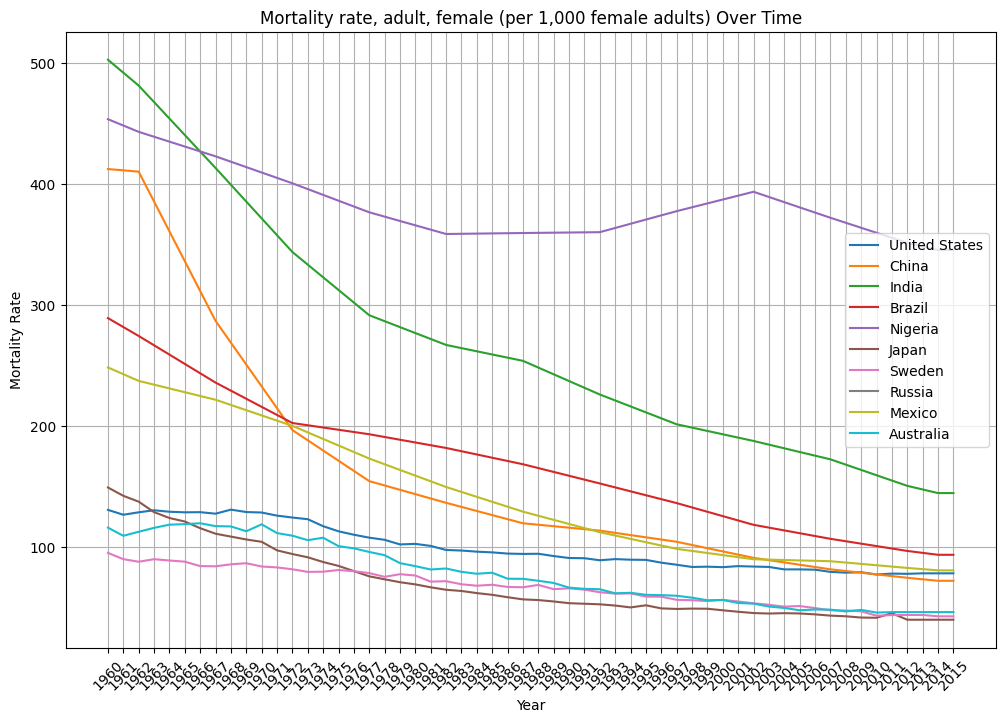

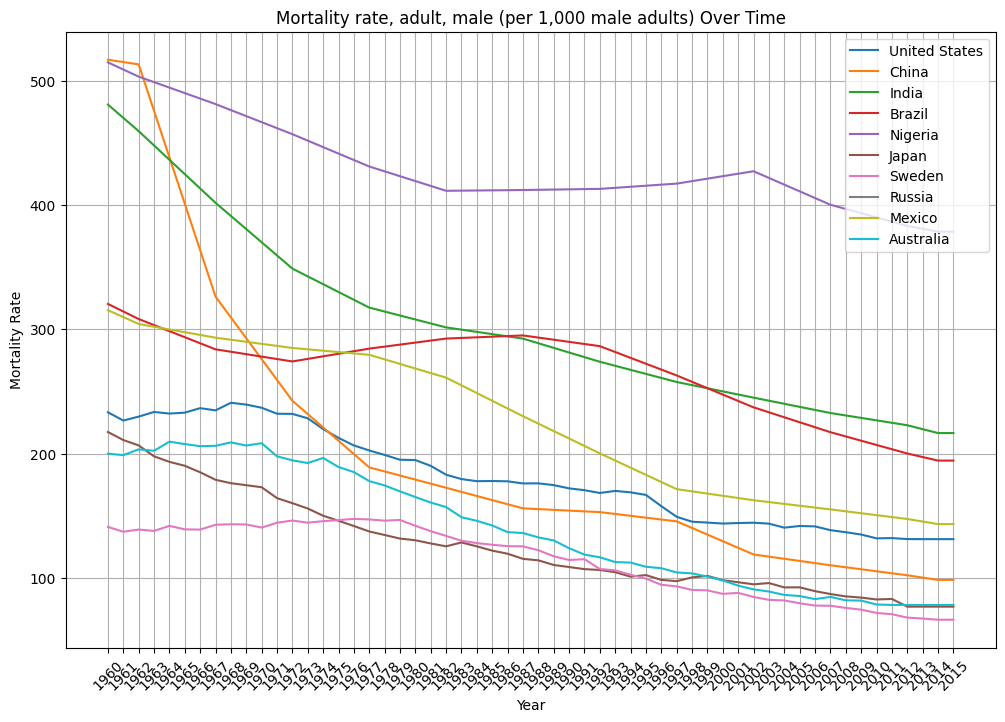

In [ ]:
sampled_countries = ['United States', 'China', 'India', 'Brazil', 'Nigeria',
                      'Japan', 'Sweden', 'Russia', 'Mexico', 'Australia']

proxy_targets = [
    'Mortality rate, adult, female (per 1,000 female adults)',
    'Mortality rate, adult, male (per 1,000 male adults)']

filtered_df = filtered_health_data_df[filtered_health_data_df['Country Name'].isin(sampled_countries)]

for indicator in proxy_targets:
  plt.figure(figsize=(12, 8))
  for country in sampled_countries:
      country_data = filtered_df[filtered_df['Country Name'] == country]
      country_data['Year'] = pd.to_numeric(country_data['Year'])
      country_data_sorted = country_data.sort_values(by='Year')
      plt.plot(country_data_sorted['Year'], country_data_sorted[indicator], label=country)
  plt.title(f'{indicator} Over Time')
  plt.xlabel('Year')
  plt.ylabel('Mortality Rate')
  plt.xticks(range(int(min(filtered_df['Year'])), int(max(filtered_df['Year'])) + 1), rotation=45)
  plt.legend()
  plt.grid(True)

plt.show()

We check below for any indicators that may be related to mortality by containing "Mortality" in the column label:

In [ ]:
for column in filtered_health_data_df.columns.tolist():
  if column.startswith('Mortality'):
    print(column)

Mortality rate, adult, female (per 1,000 female adults)
Mortality rate, adult, male (per 1,000 male adults)
Mortality rate, infant (per 1,000 live births)
Mortality rate, infant, female (per 1,000 live births)
Mortality rate, infant, male (per 1,000 live births)
Mortality rate, neonatal (per 1,000 live births)
Mortality rate, under-5 (per 1,000)
Mortality rate, under-5, female (per 1,000)
Mortality rate, under-5, male (per 1,000)


After taking a closer look at the mortality rate indicators, we chose to drop any indicators that specify mortality due to their overlap with the target of our modeling. We can see by plotting the correlation matrix for the mortality indicators that they have high collinearity as shown by the dark red and blue cells with values close to 1 or -1. Therefore, we choose to remove them from the modeling dataset.

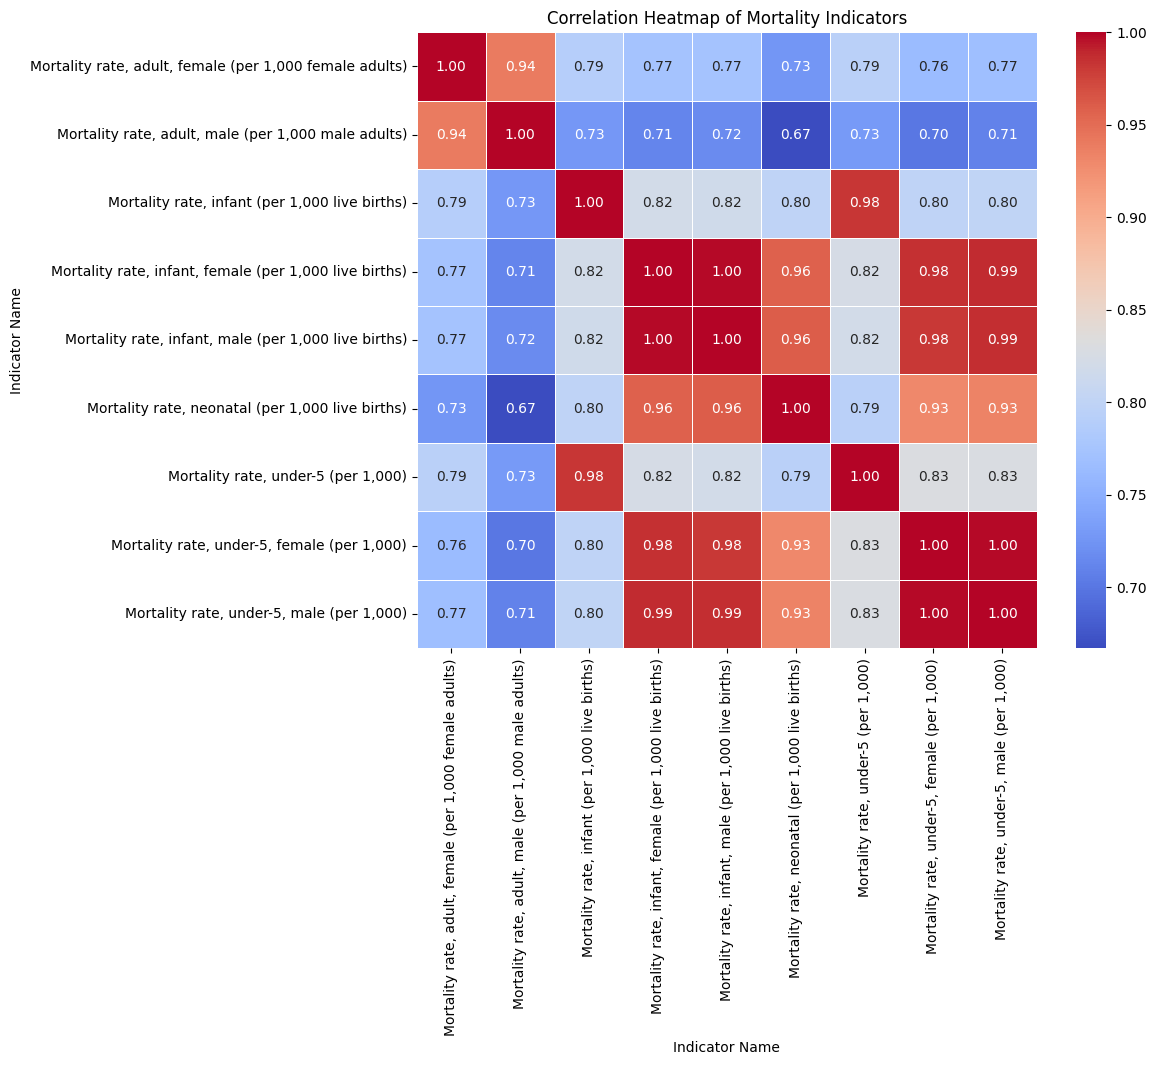

In [ ]:
mortality_indicators = [
    'Mortality rate, adult, female (per 1,000 female adults)',
    'Mortality rate, adult, male (per 1,000 male adults)',
    'Mortality rate, infant (per 1,000 live births)',
    'Mortality rate, infant, female (per 1,000 live births)',
    'Mortality rate, infant, male (per 1,000 live births)',
    'Mortality rate, neonatal (per 1,000 live births)',
    'Mortality rate, under-5 (per 1,000)',
    'Mortality rate, under-5, female (per 1,000)',
    'Mortality rate, under-5, male (per 1,000)',
]

mortality_matrix_df = filtered_health_data_df[mortality_indicators]

correlation_matrix = mortality_matrix_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Mortality Indicators')
plt.show()

As mentioned above we create a single target indicator column that averages male and female adult mortality rate.

In [ ]:
# Create target variable (mortality rate = average of male/female mortality rate, assumes even ratio of males:females)
filtered_health_data_df['Adult Mortality Rate'] = filtered_health_data_df[proxy_targets].mean(axis=1)

# Remove indicators that are direct meaures of mortality rate
filtered_transformed_data_df = filtered_health_data_df.drop(columns=mortality_indicators)


<ipython-input-27-dcf221246b6b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_health_data_df['Adult Mortality Rate'] = filtered_health_data_df[proxy_targets].mean(axis=1)


We next create a single ID column that combines year and country in a string to make a unique identifier for each country-year record.

In [ ]:
# Create an id column that combines year and country for a unique value
filtered_transformed_data_df['id'] = filtered_transformed_data_df['Year'].astype(str) + '_' + filtered_transformed_data_df['Country Name']
id_column_index = filtered_transformed_data_df.columns.get_loc('id')
# Pop the id column from the end and insert it to the beginning of the data frame to make it more organized
filtered_transformed_data_df.insert(0, filtered_transformed_data_df.columns[id_column_index], filtered_transformed_data_df.pop(filtered_transformed_data_df.columns[id_column_index]))

filtered_transformed_data_df

<ipython-input-28-a2c4ed326650>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_transformed_data_df['id'] = filtered_transformed_data_df['Year'].astype(str) + '_' + filtered_transformed_data_df['Country Name']
<ipython-input-28-a2c4ed326650>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_transformed_data_df.insert(0, filtered_transformed_data_df.columns[id_column_index], filtered_transformed_data_df.pop(filtered_transformed_data_df.columns[id_column_index]))


Indicator Name,id,Country Name,Year,AIDS estimated deaths (UNAIDS estimates),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female",...,Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)",Urban population,Urban population (% of total),Urban population growth (annual %),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women's share of population ages 15+ living with HIV (%),Adult Mortality Rate
0,1960_Afghanistan,Afghanistan,1960,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,...,81.894737,15.796,7.356,8.58,739462.0,8.221,5.253807,88.823529,26.990098,577.8590
1,1961_Afghanistan,Afghanistan,1961,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,...,81.894737,15.796,7.356,8.58,779754.0,8.508,5.305559,88.823529,26.990098,572.2085
2,1962_Afghanistan,Afghanistan,1962,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,...,81.894737,15.796,7.356,8.58,822719.0,8.805,5.363622,88.823529,26.990098,566.5580
3,1963_Afghanistan,Afghanistan,1963,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,...,81.894737,15.796,7.356,8.58,868325.0,9.110,5.395136,88.823529,26.990098,561.1980
4,1964_Afghanistan,Afghanistan,1964,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,...,81.894737,15.796,7.356,8.58,917022.0,9.426,5.456539,88.823529,26.990098,555.8380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,2011_Zimbabwe,Zimbabwe,2011,43000.0,114.1658,1.300000e+06,74000.000000,1.200000e+06,65000.000000,20.525000,...,80.000000,6.000,4.700,5.40,4706484.0,33.015,1.449081,47.000000,58.899308,508.2425
12148,2012_Zimbabwe,Zimbabwe,2012,37000.0,113.3310,1.300000e+06,70000.000000,1.200000e+06,64000.000000,20.450000,...,81.000000,6.000,4.700,5.30,4782430.0,32.834,1.600765,61.000000,58.939080,463.6375
12149,2013_Zimbabwe,Zimbabwe,2013,35000.0,111.8664,1.300000e+06,69000.000000,1.300000e+06,63000.000000,20.375000,...,80.000000,5.600,5.100,5.30,4864823.0,32.654,1.708155,34.000000,58.900126,430.5050
12150,2014_Zimbabwe,Zimbabwe,2014,30000.0,110.4018,1.400000e+06,65000.000000,1.300000e+06,61000.000000,20.300000,...,80.000000,5.400,5.300,5.40,4955055.0,32.501,1.837793,32.000000,58.822335,397.3720


Below we can see the distribution of the calculated adult mortality rate column at the beginning of each decade: 1990, 2000, and 2010. This distribution shows the general shape of the mortality rate data, indicating that most countries seem to be on the lower end of the mortality rate per 1000. A snapshot at each of these years shows that the mean of the data and its general distribution seem to remain relatively unchanged.

Althought the distributions are left skewed, there do not seem to be many outliers for the sampled years (perhaps over 700 in 2000). The mortality rates take a large range of values that are generally consistent. This shows that the data is not imbalanced, and that predicting mortality is not a trivial task for the model. For example, it is not likely that the model would score highly if it only guessed the mean mortality rate for all of its predictions. This is shown by the shape of the example distributions.

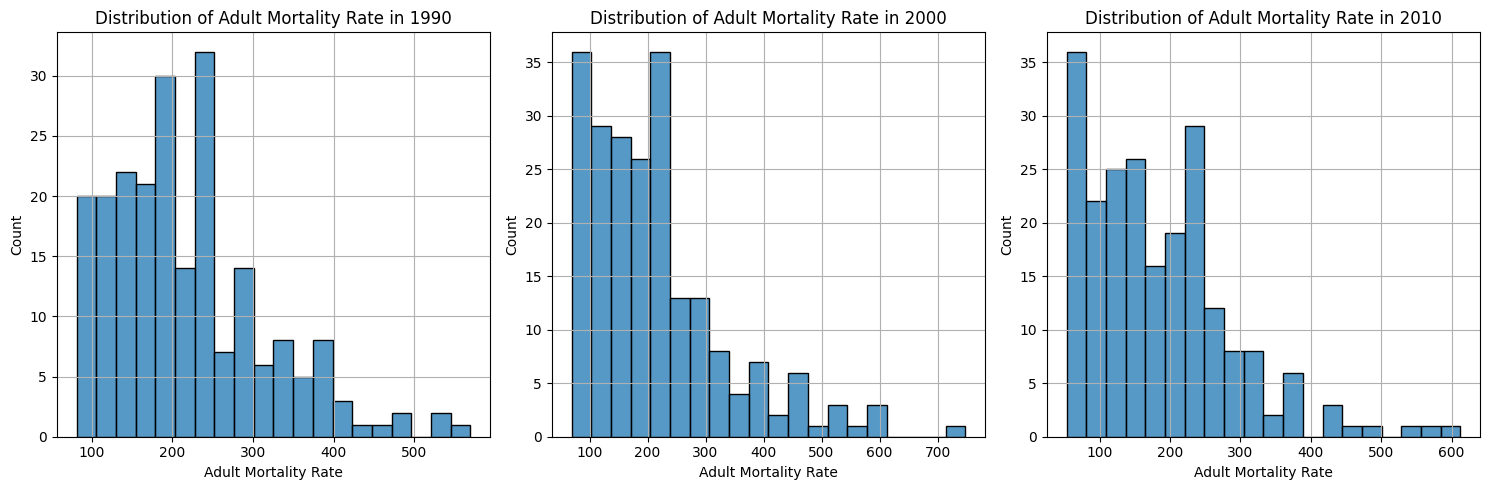

In [ ]:
# We will plot the distribution at the start of each decade
years_of_interest = ['1990', '2000', '2010']

plt.figure(figsize=(15, 5))

# iterate over the years and create a histogram of the mortality rate values for each
for i, year in enumerate(years_of_interest, 1):
    plt.subplot(1, len(years_of_interest), i)

    data_subset = filtered_transformed_data_df[filtered_transformed_data_df['Year'] == year]

    sns.histplot(data=data_subset, x='Adult Mortality Rate', bins=20, stat='count')

    plt.title(f'Distribution of Adult Mortality Rate in {year}')
    plt.xlabel('Adult Mortality Rate')
    plt.ylabel('Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

### **2.2.1** Feature Analysis

The large number of indicator features make feature selection for the modeling dataset a challenge. In order to get a better idea of the general collinearity of the dataset, we take a sample of indicators to represent the feature set. We then plot the correlation matrix as a heat map to visualize the colinearity between indicators in this set.

We see from the data that seemingly unrelated indicator columns seem to have high correlation. For example, Fertility Rate has a 0.87 score with Age Dependency Ratio. Additionally, urban and rural population percentage have a score of -1.0, indicating a strong negative correlation between the features. There are also instances of the same indicators measured across different groups. For example primary school enrollment having high correlation with primary school completion, or unemployment for males having high correlation with unemployment for females.

Since we have well over 300 columns for each country-year combination, it makes it difficult to hand-pick features without falling into unexpected traps of collinearity such as those mentioned above. Therefore, we explore using PCA in the next section.

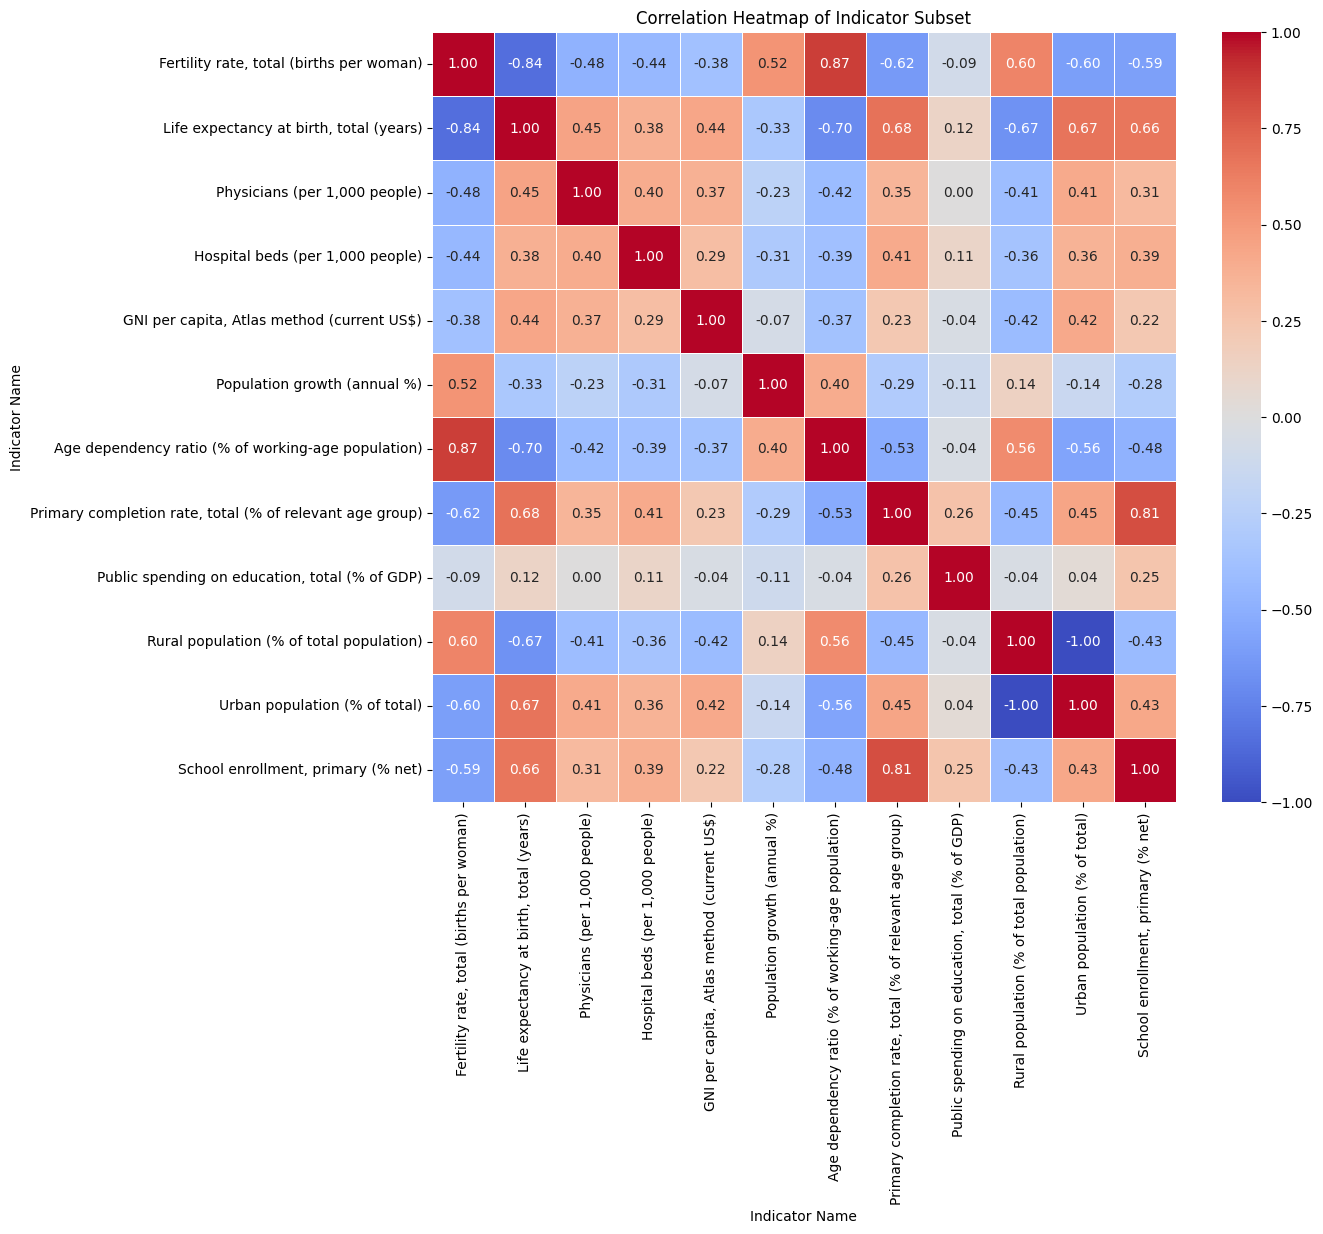

In [ ]:
indicator_subset = [
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Physicians (per 1,000 people)',
    'Hospital beds (per 1,000 people)',
    'GNI per capita, Atlas method (current US$)',
    'Population growth (annual %)',
    'Age dependency ratio (% of working-age population)',
    'Primary completion rate, total (% of relevant age group)',
    'Public spending on education, total (% of GDP)',
    'Rural population (% of total population)',
    'Urban population (% of total)',
    'School enrollment, primary (% net)',
]

selected_df = filtered_transformed_data_df[indicator_subset]

correlation_matrix = selected_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Indicator Subset')
plt.show()

In [ ]:
# Remove year column and country column because we have a unique identifier column now
final_df = filtered_transformed_data_df.drop(['Year', 'Country Name'], axis=1)
final_df

Indicator Name,id,AIDS estimated deaths (UNAIDS estimates),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),...,Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)",Urban population,Urban population (% of total),Urban population growth (annual %),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women's share of population ages 15+ living with HIV (%),Adult Mortality Rate
0,1960_Afghanistan,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,81.717726,...,81.894737,15.796,7.356,8.58,739462.0,8.221,5.253807,88.823529,26.990098,577.8590
1,1961_Afghanistan,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,82.755896,...,81.894737,15.796,7.356,8.58,779754.0,8.508,5.305559,88.823529,26.990098,572.2085
2,1962_Afghanistan,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,83.304557,...,81.894737,15.796,7.356,8.58,822719.0,8.805,5.363622,88.823529,26.990098,566.5580
3,1963_Afghanistan,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,83.550740,...,81.894737,15.796,7.356,8.58,868325.0,9.110,5.395136,88.823529,26.990098,561.1980
4,1964_Afghanistan,250.0,145.3210,2.869231e+03,611.538462,2.769231e+03,592.307692,17.339535,25.356977,83.734442,...,81.894737,15.796,7.356,8.58,917022.0,9.426,5.456539,88.823529,26.990098,555.8380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,2011_Zimbabwe,43000.0,114.1658,1.300000e+06,74000.000000,1.200000e+06,65000.000000,20.525000,25.425000,80.740494,...,80.000000,6.000,4.700,5.40,4706484.0,33.015,1.449081,47.000000,58.899308,508.2425
12148,2012_Zimbabwe,37000.0,113.3310,1.300000e+06,70000.000000,1.200000e+06,64000.000000,20.450000,25.350000,80.579870,...,81.000000,6.000,4.700,5.30,4782430.0,32.834,1.600765,61.000000,58.939080,463.6375
12149,2013_Zimbabwe,35000.0,111.8664,1.300000e+06,69000.000000,1.300000e+06,63000.000000,20.375000,25.275000,80.499816,...,80.000000,5.600,5.100,5.30,4864823.0,32.654,1.708155,34.000000,58.900126,430.5050
12150,2014_Zimbabwe,30000.0,110.4018,1.400000e+06,65000.000000,1.300000e+06,61000.000000,20.300000,25.200000,80.456439,...,80.000000,5.400,5.300,5.40,4955055.0,32.501,1.837793,32.000000,58.822335,397.3720


## **2.3** Final Modeling Data

### **2.3.1** Splitting the Cleaned Data

In this section, we split the data into a feature dataframe and target dataframe. Once separated, we call train_test_split to conduct an 80/20 split on the data for training and testing sets, respectively.

In [ ]:
# Features will be all indicator columns (all columns except ID and target column)
features = final_df.drop(columns=['id', 'Adult Mortality Rate'])

In [ ]:
target = final_df['Adult Mortality Rate']
target

0        577.8590
1        572.2085
2        566.5580
3        561.1980
4        555.8380
           ...   
12147    508.2425
12148    463.6375
12149    430.5050
12150    397.3720
12151    397.3720
Name: Adult Mortality Rate, Length: 12152, dtype: float64

In [ ]:
# Assign seed value and conduct 80/20 train-test split with random_state = seed
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

### **2.3.2** PCA

In order to perform PCA, we first use standard scaling to ensure that each feature has a mean of 0 and a standard deviation of 1. This is a necessary step for preprocessing to ensure that the units of indicator variables do not skew assessment of feature impact.

PCA is then applied to the scaled training data set. We specify that PCA should retain principal components that explain at least 80% of the variance in the data. We plot explained variance ratio to visualize how much variance each principal component explains.

The explained variance ratio plot shows a sharp decrease over the first 3 principal components. This suggests that the first three components explain a large amount of variance.

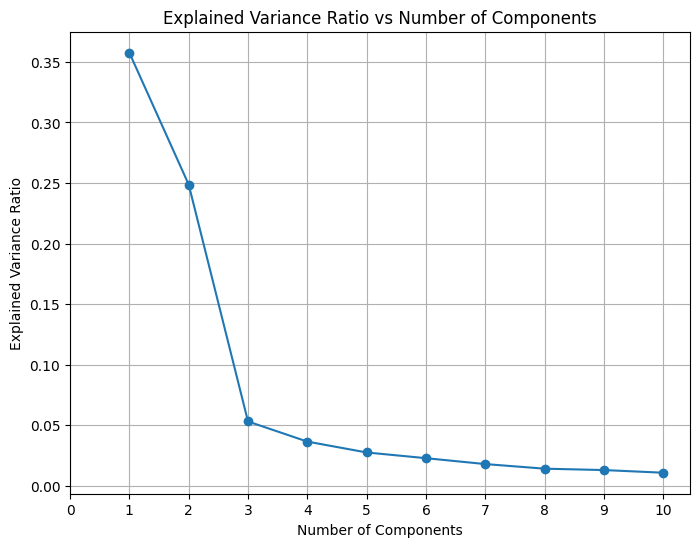

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA on scaled training data to explain >= 80% of variance
pca = PCA(n_components=0.8)
pca.fit(X_train_scaled)

plt.figure(figsize=(8,6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(pca.n_components_+1))
plt.grid(True)
plt.show()

The Cumulative Explained Variance Ratio plot shows that 10 principal components are needed to retain 80% of the variance in our dataset.

In [ ]:
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = explained_variance_ratios.cumsum()

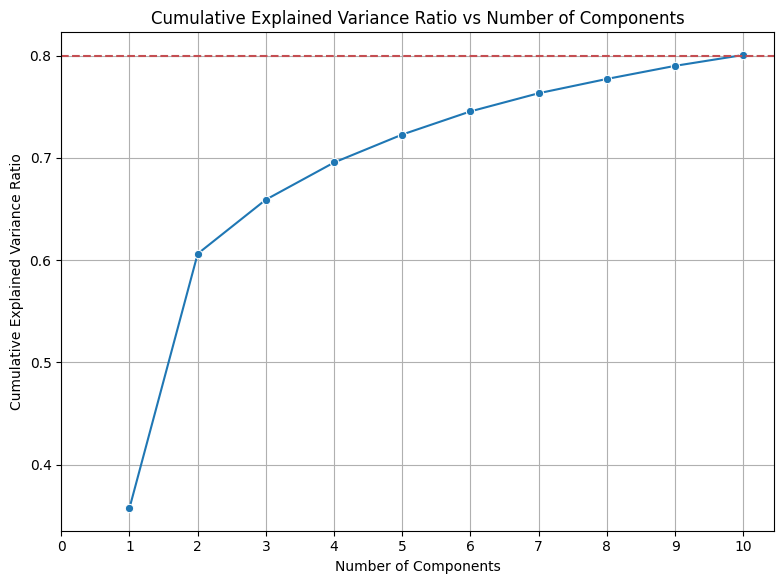

In [ ]:
n_components = len(explained_variance_ratios)

plt.figure(figsize=(8,6))
sns.lineplot(x=range(1, n_components + 1), y=cum_evr, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')

plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(len(cum_evr)+1))

sns.set(style="whitegrid")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Transform on training+testing sets
X_train_pca = pca.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# **Part III:** Modeling

For purposes of modeling, we aimed to evaluate a couple different classes of supervised machine learning regression models, namely linear models and ensemble decision tree models. We began modeling with the former, as it provides a simplified approach to fitting the data by assuming only linear relationships between the features and labels. After linear modeling, we moved onto ensemble decision tree modeling which has the added benefit of modeling non-linear decision boundaries.

With multiple models being fit, we needed some metrics to assess model performance. We leaned on $R^2$ score and root mean squared error (RMSE) to evaluate the performance of each model due to their ubiquity in industry and ease of use with the sklearn API. A summary of each metric is provided below:

**$R^2$ score:** Coefficient of determination
 - Defined mathematically as: $R^2 = \frac{RSS}{TSS} = \frac{\sum_{i=1}^n (\hat{y_i} - \bar{Y})}{\sum_{i=1}^n(y_i - \bar{Y})^2}$
 - Maximum score is 1.0
 - Score can go negative if model is arbitrarily worse than simply predicting the mean of the data

**Root mean squared error (RMSE):** Square root of mean squared errors
- Defined mathematically as: $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2}$
- Units of error defined by dataset, will be in units of annual deaths per 1000 for the purposes of this project

## **3.1** Linear Regression

We first start with creating a basic linear regression model:

### **3.1.1** Basic Linear Regression Model

In [ ]:
# Initialize LinearRegression model w/ default parameters and fit it on the training set
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set
y_pred = reg.predict(X_test_pca)

# Find the R-squared score for the model on the test data
score_lin_reg = r2_score(y_test, y_pred)
print("Basic Linear Regression R-squared score: ", score_lin_reg)

# Find the RMSE for the model on the test data
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred))
print("Basic Linear Regression RMSE: ", rmse_lin_reg)

Basic Linear Regression R-squared score:  0.7834971118237606
Basic Linear Regression RMSE:  52.98662938007256


After training a basic linear regression model on our PCA transformed data, we achieved an acceptable $R^2$ score of 0.78 and an RMSE of 52.99 (deaths per 1000 people).

### **3.1.2** Ridge Regularization

We next consider incorporating regularization as a way to improve our model, starting with Ridge (L2) regularization. We know that Ridge regularization is particularly useful for addressing multicollinearity or overfitting of the training data.

Since we have already addressed multicollinearity in our data using PCA, we will first assess whether our original model may be overfitting the training data.

In [ ]:
# Use the trained model to predict on the training set
y_pred_train = reg.predict(X_train_pca)

# Find the R-squared score for the model on the training data
score_lin_reg_train = r2_score(y_train, y_pred_train)
print("Basic Linear Regression R-squared training score: ", score_lin_reg_train)

Basic Linear Regression R-squared training score:  0.7929911936295571


Since the $R^2$ score is not significantly higher on the training set compared to the testing set (in fact they are approximately equal), it does not appear that our original model is overfitting the training data.

We will still perform Ridge (L2) Regression to illustrate this fact.

In [ ]:
# Initialize Ridge regression model w/ alpha = 10 (manually tuned) and fit on the training set
reg_ridge = Ridge(alpha=10)
reg_ridge.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set
y_pred_ridge = reg_ridge.predict(X_test_pca)

# Find the R-squared score for the Ridge regression model
score_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R-squared score: ", score_ridge)

# Find the RMSE for the model on the test data
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression RMSE: ", rmse_ridge)

Ridge Regression R-squared score:  0.7834979853831763
Ridge Regression RMSE:  52.986522483078986


As expected, since we've already reduced multicollinearity using PCA and our original linear regression model did not overfit the training data, there is no signficant difference in performance for the Ridge regression model compared to our basic linear regression model.

### **3.1.3** Lasso Regularization

While we did not achieve any improvement using Ridge regularization, we know that Lasso (L1) regularization can be useful in reducing features when there isn't multicollinearity (which is the case since we've performed PCA). This is achieved by Lasso regression pushing coefficients to exactly zero if they don't have a significant effect on the error.

In [ ]:
# Initialize Lasso regression model with alpha = 5 (manually tuned) and fit on the training set
reg_lasso = Lasso(alpha=5)
reg_lasso.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set
y_pred_lasso = reg_lasso.predict(X_test_pca)

# Find the R-squared score for the Lasso regression model
score_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R-squared score: ", score_lasso)

# Find the RMSE for the model on the test data
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression RMSE: ", rmse_lasso)

Lasso Regression R-squared score:  0.7803988861960236
Lasso Regression RMSE:  53.36441045217303


As shown, we again achieve near identical performance using a Lasso regression model. However, we can now observe how the coefficients for our principal components have changed for the Lasso regression model compared to our previous models:

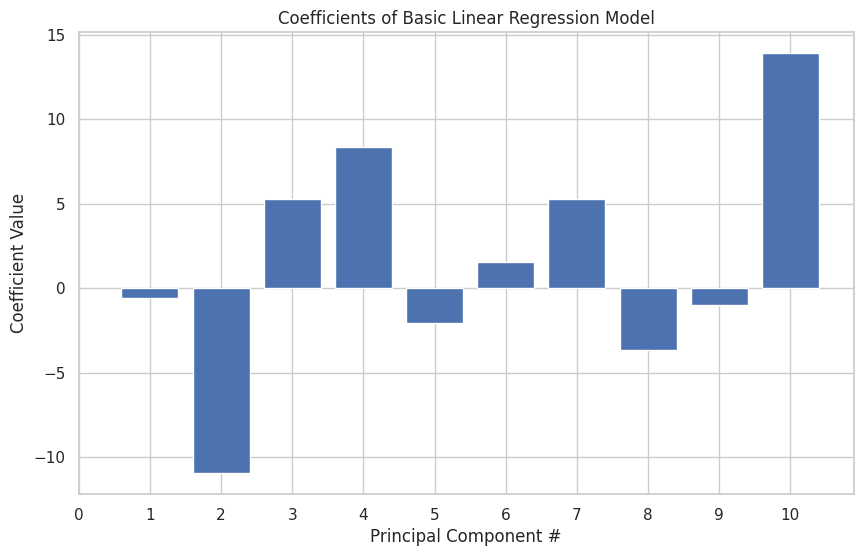

In [ ]:
# Get coefficients from the basic linear regression model
coefficients = reg.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(coefficients)+1), coefficients)
plt.xlabel('Principal Component #')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Basic Linear Regression Model')
plt.xticks(range(len(coefficients)+1))
plt.show()

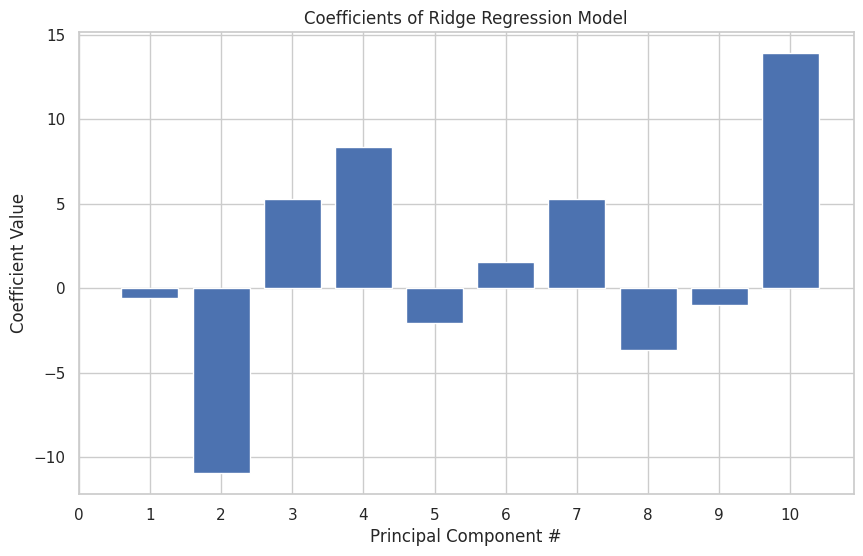

In [ ]:
# Get coefficients from the Ridge regression model
coefficients = reg_ridge.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(coefficients)+1), coefficients)
plt.xlabel('Principal Component #')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Ridge Regression Model')
plt.xticks(range(len(coefficients)+1))
plt.show()

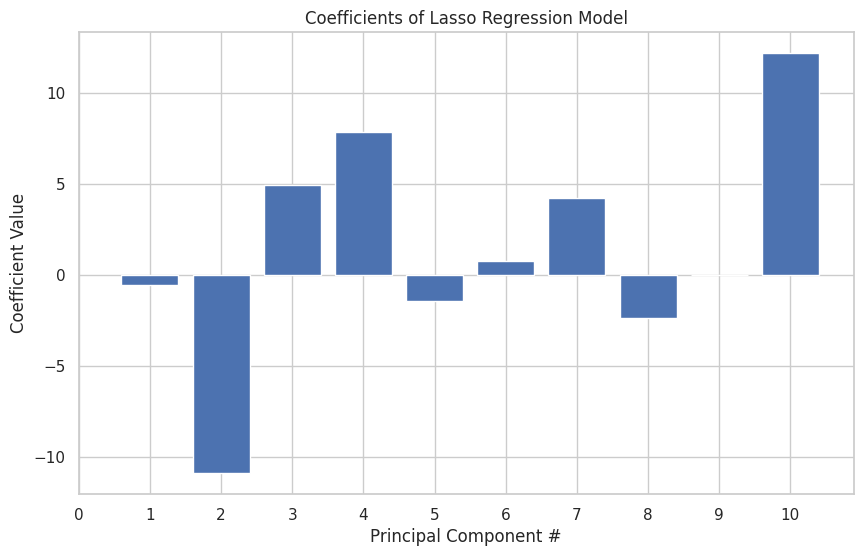

In [ ]:
# Get coefficients from the Lasso regression model
coefficients = reg_lasso.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(coefficients)+1), coefficients)
plt.xlabel('Principal Component #')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Lasso Regression Model')
plt.xticks(range(len(coefficients)+1))
plt.show()

As shown from the 3 plots, the basic linear regression model and Ridge regression model have near identical component coefficients. However, the Lasso regression model has a coefficient of 0 for principal component #9.

This is useful because we are able to simplify our model (by excluding the component with coefficient=0) with very minimal drop in performance as shown from the performance metrics calculated earlier.

## **3.2** Random Forest Regressor

While our linear regression model was effective for predicting mortality rate, the $R^2$ score hit an asymptote around 0.79, which is below the theoretical maximum of 1.0. In an attempt to provide a model that could attain an $R^2$ score closer to this theoretical maximum, we turned to an ensemble decision tree based model - a random forest regressor. Ensemble based methods provide the benefit of being able to model non-linear relationships between features while retaining the inherent interpretability of decision trees. Therefore, using a model from this family proved to be suitable for our use-case, as it can learn the non-linear aspects of our dataset that our linear regression models could not.

### **3.2.1** Baseline Random Forest Model

To start modeling with a random forest model, we will fit our training data with the default model hyperparameters provided by the sklearn API. With this model, we can assess any change in model performance by evaluating $R^2$ score and RMSE. This will give us a baseline model that we can iteratively improve going forward.

In [ ]:
rf = RandomForestRegressor(random_state=42).fit(X_train_pca, y_train)  # Fit baseline model
y_pred = rf.predict(X_test_pca)
score_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Baseline random forest score: {score_rf}")
print(f"Baseline random forest RMSE: {rmse_rf}")

Baseline random forest score: 0.9774764866694315
Baseline random forest RMSE: 17.09041127831202


We immediately see a signficant improvement from our linear regression model when using a baseline random forest regressor. Our $R^2$ score jumped from 0.783 to 0.977, and our RMSE decreased from 53.0 to 17.1. While some might be satisfied with this immediate improvement, we sought to improve further! For this, we turned to hyperparameter tuning our model to squeeze out as much accuracy as possible.

### **3.2.2** Hyperparameter Tuning

Hyperparameter tuning is often looked at as more of an art than a science. While (*in theory*) theory could be used to deduce the "optimal" hyperparameter settings, this is often an ineffective use of time. In practice, a trial and error approach is typically used, which is the approach we took.

Two common strategies for hyperparameter tuning within the sklearn framework are randomized search cross validation and grid search cross validation. Both methods fit training data to a model with specified hyperparameters and perform K-fold cross validation on the dataset, tracking the hyperparameter combinations and their associated scores.

However, the methods differ in how the hyperparameters are selected at each iteration. The randomized search method randomly samples combinations of hyperparameters from pre-defined distributions for a set number of iterations and runs K-fold cross validation on these samples. The grid search method runs K-fold cross validation for all possible combinations of hyperparameters passed in.

Due to these differences, we will start tuning using randomized cross validation to get a general sense of the range of effective hyperparameter combinations. Once we have these settings, we will try tuning further by running grid search cross validation with pre-defined setting combinations focused around the optimal parameters found in the randomized search.

#### **3.2.2.1** Randomized Search Cross Validation

First, we need to define our hyperparameter distributions. We define a dictionary the maps hyperparameters to specific distributions which will be drawn from at random during the randomized cross validation search.

In [ ]:
param_grid = {
    "n_estimators": list(np.arange(25, 500, 25)),  # Number of trees in random forest
    "max_features": ["auto", "sqrt"],  # Max number of features to consider at each tree split
    "max_depth": list(np.arange(5, 100, 5)) + [None],  # Maximum tree depth
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split node
    "min_samples_leaf": [1, 2, 5],  # Minimum number of samples required at each leaf
    "bootstrap": [True, False]  # Toggle for bootstrap tree training (with or without sample replacement)
}

Before we initialize the randomized search, let's see how many possible combinations exist within the pre-defined `param_grid` (if we wanted to run *every* possible combination).

In [ ]:
num_combinations = 1
for data in param_grid.values():
    num_combinations *= len(data)
num_combinations

13680

As you can see, there are a whopping 13,680 combinations to check. If we used grid search, all of these would be evaluated, which would inefficiently consume a lot of time and compute resources. This is why we will first resort to randomized search, which allows us to pick 100 random samples (from the 13,680) and yields a ballpark estimate of the optimal hyperparameters.

In [ ]:
rf_rand_cv = RandomizedSearchCV(
    estimator=RandomForestRegressor(),  # Still using random forest regressor
    param_distributions=param_grid,  # Pass in parameter distributions
    n_iter=100,  # Force 100 randomized searches
    cv=3,  # 3 fold cross validation
    random_state=42  # Set random_state for reproducibility
)
rf_rand_cv.fit(X_train_pca, y_train)

# Extract the best model from the randomized cross validation
rf_rand_best = rf_rand_cv.best_estimator_

# Calculate R2 and RMSE with tuned model
score_rf_rand_best = rf_rand_best.score(X_test_pca, y_test)
rmse_rf_rand_best = np.sqrt(mean_squared_error(y_test, rf_rand_best.predict(X_test_pca)))
print(f"Randomized search score: {score_rf_rand_best}")
print(f"Randomized search RMSE : {rmse_rf_rand_best}")

# Check how R2 score and RMSE changed from baseline
score_improvement = score_rf_rand_best - score_rf
rmse_improvement = rmse_rf - rmse_rf_rand_best
print(f"Score improvement from baseline: {score_improvement}")
print(f"RMSE improvement from baseline: {rmse_improvement}")

Randomized search score: 0.9885001551827217
Randomized search RMSE : 12.211821190022137
Score improvement from baseline: 0.011023668513290175
RMSE improvement from baseline: 4.878590088289881


While there wasn't much room for improvement, the randomized search tuning still gave a modest improvement in $R^2$ score and RMSE. Now, with this improved model, we will try going one step further by extracting the hyperparameter setting for the best model and performing grid search cross validation around these settings. First, let's extract the hyperparameter settings from the best randomized search model.

In [ ]:
rf_rand_cv.best_params_

{'n_estimators': 450,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

#### **3.2.2.2** Grid Search Cross Validation

Using the best parameters from the previous tuning, we can set up our grid search such that these values are the focal point of the search. What we are trying to do is taking the tuning one step further, searching through ranges around the ballpark settings provided by the randomized search. After this tuning, an improvement in $R^2$ score and RMSE would indicate there is still room for improvement, while a reduction or flat change will indicate we have likely hit an asymptote on model performance. To start this process, we will set a `param_grid` like we did before.

In [ ]:
param_grid = {
    "n_estimators": [200, 450, 700],  # Number of trees in random forest
    "max_features": ["auto", "sqrt"],  # Max number of features to consider at each tree split
    "max_depth": [50, 100, None],  # Maximum tree depth
    "min_samples_split": [2],  # Minimum number of samples required to split node
    "min_samples_leaf": [1, 2, 3],  # Minimum number of samples required at each leaf
    "bootstrap": [True, False]  # Toggle for bootstrap tree training (with or without sample replacement)
}

Similar to what we did with randomized search, lets evaluate how many iterations of cross validation we will have to perform.

In [ ]:
num_combinations = 1
for data in param_grid.values():
    num_combinations *= len(data)
num_combinations

108

Now that we have narrowed down the search, we have a much more reasonable number of combinations to run cross validation on. This reduction will drastically help running time and resource consumption. Now that we've checked our search iterations is within acceptable limits, let's run the grid search!

In [ ]:
rf_grid_cv = GridSearchCV(
    estimator=RandomForestRegressor(),  # Still using random forest regressor
    param_grid=param_grid,  # Pass in parameter combinations
    cv=3  # 3 fold cross validation
)
rf_grid_cv.fit(X_train_pca, y_train)

# Extract the best model from the grid cross validation
rf_grid_best = rf_grid_cv.best_estimator_

# Calculate R2 and RMSE with tuned model
score_rf_grid_best = rf_grid_best.score(X_test_pca, y_test)
rmse_rf_grid_best = np.sqrt(mean_squared_error(y_test, rf_grid_best.predict(X_test_pca)))
print(f"Grid search score: {score_rf_grid_best}")
print(f"Grid search RMSE : {rmse_rf_grid_best}")

# Check how R2 score and RMSE changed from randomized search
score_improvement = score_rf_grid_best - score_rf_rand_best
rmse_improvement = rmse_rf_rand_best - rmse_rf_grid_best
print(f"Score improvement from randomized: {score_improvement}")
print(f"RMSE improvement from randomized: {rmse_improvement}")

Grid search score: 0.9886865671347921
Grid search RMSE : 12.112440276502706
Score improvement from randomized: 0.00018641195207036443
RMSE improvement from randomized: 0.09938091351943079


As shown, we observed a miniscule increase in $R^2$ score and a miniscule decrease in RMSE after running grid search cross validation. This means we have effectively reached the performance limit of the random forest regressor model.

## **3.3** Model Comparison

Now that we have built several models for predicting mortality rate, we want to visually examine the output metrics from each model to downselect our best model that we would like to go forward with. Below we plot the change in $R^2$ score and RMSE between models.

(0.0, 60.0)

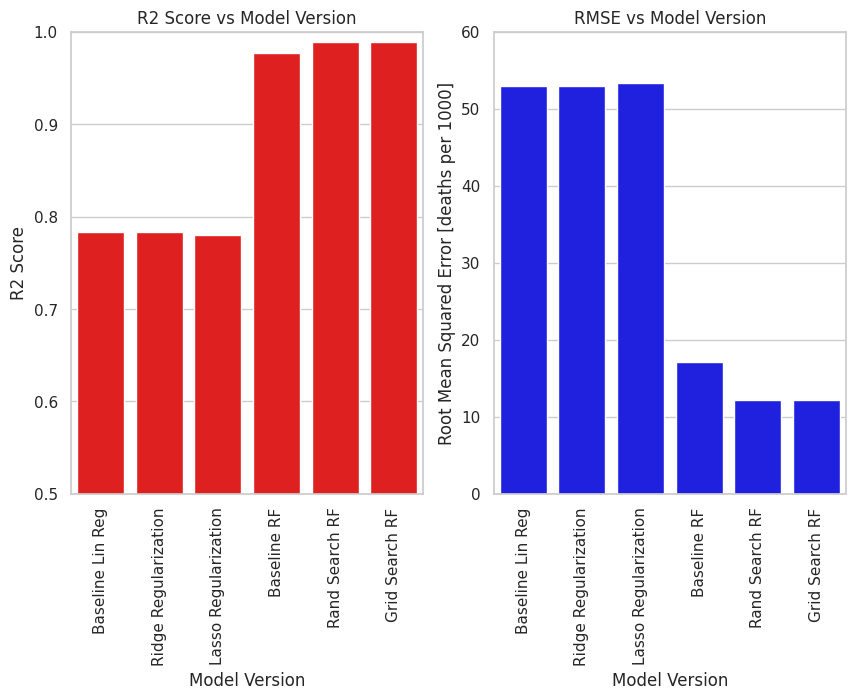

In [ ]:
# Data to be plotted
models = ["Baseline Lin Reg", "Ridge Regularization", "Lasso Regularization", "Baseline RF", "Rand Search RF", "Grid Search RF"]
scores = [score_lin_reg, score_ridge, score_lasso, score_rf, score_rf_rand_best, score_rf_grid_best]
errors = [rmse_lin_reg, rmse_ridge, rmse_lasso, rmse_rf, rmse_rf_rand_best, rmse_rf_grid_best]

# Build plot
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x=models, y=scores, ax=axes[0], color="red")
axes[0].set_title("R2 Score vs Model Version")
axes[0].set_ylabel("R2 Score")
axes[0].set_xlabel("Model Version")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylim([0.5, 1.0])
sns.barplot(x=models, y=errors, ax=axes[1], color="blue")
axes[1].set_title("RMSE vs Model Version")
axes[1].set_ylabel("Root Mean Squared Error [deaths per 1000]")
axes[1].set_xlabel("Model Version")
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylim([0, 60])

Visually, we can see our peak model performance came with the model generated from grid search, as it maximizes $R^2$ score while minimizing RMSE. While we cut off the tuning after our grid search, this does not mean there is no possible improvement to be made. There likely exists some combination of hyperparameters that can beat the performance of our grid search model, but we can confidently deduce the result would be marginal at best and is not worth the effort searching for. Therefore, we can go forward with the model produced by grid search as our best performing model. Here is a summary of our optimal model performance and hyperparameter settings:

In [ ]:
print(f"Optimal R2 score: {score_rf_grid_best}")
print(f"Optimal RMSE: {rmse_rf_grid_best}")
print(f"Optimal hyperparameter settings:\n{rf_grid_cv.best_params_}")

Optimal R2 score: 0.9886865671347921
Optimal RMSE: 12.112440276502706
Optimal hyperparameter settings:
{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}


# **Part IV:** Project Challenges

## **4.1** Wrangling & EDA Challenges

There were several inherent aspects of the dataset that made it challenging to wrangle. The first challenge was handling the large number of null values scattered throughout the data. Missing data can introduce bias that leads to inaccurate conclusions or misleading accuracy scores. The presence of null values can exacerbate issues like overfitting, particularly when the lack of data is not random but systematically inherent to the dataset. For example, smaller countries with fewer resources may be misrepresented in the dataset because they did not report their data, and therefore their rows had to be dropped. Additionally, many countries had data from only a certain window of time. Many larger, more developed countries that presumably had more reliable data reporting still had somewhat randomly placed missing values. This had to be carefully mitigated in order to execute on certain modeling methods that cannot handle null values.

The method that was used dropped rows based on a threshold for how much data was null, and then imputed the remaining values. Determining this threshold posed a challenge of balancing enough training data with enough original data such that the model still performs well. Choosing the method for imputation was a challenge to avoid introducing bias or lose too much variability in the data. Imputed values are estimates that are subject to error, and poor imputation can propagate this error through the model.

Another challenging part of the dataset was the large number of features. This adds overall complexity to the modeling data and increases the risk of overfitting. With this number of indicators, it became difficult to analyze the collinearity of each and hand pick features that did not overlap. PCA served as a helpful tool but still has its drawbacks.

## **4.2** Modeling Challenges

With respect to our experience modeling, we faced challenges effectively predicting mortality rate using linear models. Fitting our training data to a basic linear regression model with default sklearn hyperparameters proved to be the most performant linear model we could develop. Incorporating ridge and lasso regularization provided no additional performance improvement (but did help to simplify the model in the case of lasso). When moving towards a random forest model, we saw significant performance gains. However, these gains came with a price: running time. It took over an hour to run our hyperparameter tuning code. Although we had ample time to wait for this project, this could be a major bottleneck in a productionized pipeline if periodic retraining was a requirement. In this event, some compromises would need to be made with respect to retraining frequency, compute resource allocation, or eliminating model tuning entirely.

# **Part V:** Conclusion & Potential Next Steps

## **5.1** Recap and Potential Impact

As shown by the calculated performance metrics of our model(s), we were able to successfully predict adult mortality rate using features from our chosen dataset. The series of steps taken as part of our EDA (Exploratory Data Analysis) allowed us to transform an incomplete and unformatted dataset into a usable form for modeling. After using PCA (Principal Component Analysis) to reduce dimensionality, we succesfully trained linear regression and random forest regressor models on our data. After applying variations on both modeling types, we eventually achieved an excellent test $R^2$ score of ~0.99 for our random forest model.

Having a model to accurately predict adult mortality rate using a subset of features can be extremely useful for several reasons:

For example, such a model could be used to predict changes in mortality rate in advance. If trends of all or the most impactful features are observed, the model can predict how mortality rate will change in tandem.

Additionally, an accurate model will identify potentially previously unknown features which strongly correlate with mortality rate. Further research of those features can be done to determine if a causal relationship also exists. Identifying such a relationship can allow for countermeasures to be implemented.

Finally, an accurate model with good predictors of high mortality rate can help to scope solution spaces for charities and government agencies. Resources can be prioritized for areas which seem to have the most impact in improving mortality rate.

## **5.2** Potential Next Steps

We've identified a few potential next steps to expand on this project:

We made a simplification in our modeling by considering adult mortality rate to be the average of adult male and adult female mortality rate. One next step could be to separately analyze male and female adult mortality rate, with the purpose of identifying any significant differences in relevant features. Similar analysis could be done for any/all of the direct mortality indicators that we excluded as part of our data wrangling above.

If there is sufficient data, another option is to train separate models for individual countries or regions of the world. This could similarly be useful to identify if certain features are more impactful in some areas versus others.

Finally, in our data wrangling stage, we used PCA to reduce approximately 275 variables into just 10 principal components. As a practicality improvement, one could start with a much smaller subset of columns based on domain knowledge and/or data availability. It would be interesting to observe how model performance changes if starting with a much smaller subset of features. If the accuracy remains high, it would be much more practical to have a model which relies on fewer features or features for which data is more easily collected.